# Assignment 3: Logistic Model

### By Sasi Nakchatree 

## Install package 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Download data 
data=pd.read_csv("C:/Users/White/OneDrive/Desktop/loan.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.dtypes.value_counts()

float64    105
object      36
int64        4
dtype: int64

In [4]:
adj_data = data.drop(["id","member_id", "term","sub_grade", "emp_title","disbursement_method"
                       ,"home_ownership","verification_status","verification_status_joint","issue_d"
                       ,"pymnt_plan","url","desc","collection_recovery_fee","int_rate","out_prncp"
                       ,"out_prncp_inv","purpose","title","zip_code","addr_state","earliest_cr_line"
                       ,"settlement_date","payment_plan_start_date","hardship_end_date","hardship_start_date"
                       ,"debt_settlement_flag_date","last_pymnt_d","next_pymnt_d","last_credit_pull_d"
                       ,"sec_app_earliest_cr_line","recoveries"],1)             

In [5]:
adj_data.dtypes.value_counts()

float64    97
object     12
int64       4
dtype: int64

## Cleaning data 

In [6]:
negative = ["all_util","annual_inc","annual_inc_joint","avg_cur_bal","bc_util",
            "hardship_last_payment_amount","il_util","inq_fi","last_pymnt_amnt",
            "mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
            "mo_sin_rcnt_tl","mths_since_last_delinq","mths_since_last_major_derog",
            "mths_since_last_record","mths_since_recent_bc_dlq","mths_since_recent_revol_delinq",
            "mths_since_recent_bc","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats",
            "num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0",
            "num_sats","open_acc","open_acc_6m","open_rv_12m","open_rv_24m","pct_tl_nvr_dlq",
            "revol_bal_joint","revol_util","sec_app_open_acc","sec_app_revol_util",
            "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_mths_since_last_major_derog",
            "total_acc","tot_cur_bal","total_bal_il","total_cu_tl"]

positive = ["acc_now_delinq","acc_open_past_24mths","bc_open_to_buy","chargeoff_within_12_mths",
            "collections_12_mths_ex_med","delinq_amnt","deferral_term","delinq_2yrs","dti",
            "dti_joint","funded_amnt_inv","hardship_amount","hardship_length","hardship_dpd",
            "hardship_payoff_balance_amount","inq_last_6mths","inq_last_12m","mths_since_rcnt_il",
            "max_bal_bc","mort_acc","mths_since_recent_inq","num_accts_ever_120_pd","num_tl_120dpd_2m",
            "num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","orig_projected_additional_accrued_interest",
            "open_act_il","open_il_12m","open_il_24m","percent_bc_gt_75","pub_rec_bankruptcies","pub_rec",
            "sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_chargeoff_within_12_mths",
            "sec_app_collections_12_mths_ex_med","settlement_amount","settlement_percentage","settlement_term",
            "tax_liens","total_bal_ex_mort","tot_hi_cred_lim","total_bc_limit","total_il_high_credit_limit",
            "total_rev_hi_lim","tot_coll_amt","total_rec_prncp","total_rec_late_fee"]

In [7]:
for i in negative:
    adj_data[i].fillna(-100000000,inplace=True)
    
for i in positive:
    adj_data[i].fillna(100000000,inplace=True)

In [8]:
adj_data["emp_length"].replace("n/a",0, inplace = True)
adj_data["emp_length"].replace("< 1 year",0, inplace = True)
adj_data["emp_length"].replace("1 year",1, inplace = True)
adj_data["emp_length"].replace("2 years",2, inplace = True)
adj_data["emp_length"].replace("3 years",3, inplace = True)
adj_data["emp_length"].replace("4 years",4, inplace = True)
adj_data["emp_length"].replace("5 years",5, inplace = True)
adj_data["emp_length"].replace("6 years",6, inplace = True)
adj_data["emp_length"].replace("7 years",7, inplace = True)
adj_data["emp_length"].replace("8 years",8, inplace = True)
adj_data["emp_length"].replace("9 years",9, inplace = True)
adj_data["emp_length"].replace("10+ years",10, inplace = True)

In [9]:
adj_data["loan_status"].replace("Current",0, inplace = True)
adj_data["loan_status"].replace("Fully Paid",0, inplace = True)
adj_data["loan_status"].replace("Default",1, inplace = True)
adj_data["loan_status"].replace("Charged Off",1, inplace = True)
adj_data["loan_status"].replace("In Grace Period",1, inplace = True)
adj_data["loan_status"].replace("Late (16-30 days)",1, inplace = True)
adj_data["loan_status"].replace("Late (31-120 days)",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Charged Off",1, inplace = True)

In [10]:
adj_data["grade"].replace("A",1, inplace = True)
adj_data["grade"].replace("B",2, inplace = True)
adj_data["grade"].replace("C",3, inplace = True)
adj_data["grade"].replace("D",4, inplace = True)
adj_data["grade"].replace("E",5, inplace = True)
adj_data["grade"].replace("F",6, inplace = True)
adj_data["grade"].replace("G",7, inplace = True)

In [11]:
adj_data["hardship_type"].replace("nan",0, inplace = True)
adj_data["hardship_type"].replace("INTEREST ONLY-3 MONTHS DEFERRAL",1, inplace = True)

In [12]:
adj_data["hardship_status"].replace("ACTIVE",1, inplace = True)
adj_data["hardship_status"].replace("COMPLETED",1, inplace = True)
adj_data["hardship_status"].replace("BROKEN",1, inplace = True)
adj_data["hardship_status"].replace("nan",0, inplace = True)

In [13]:
adj_data["hardship_reason"].replace("UNEMPLOYMENT",1, inplace = True)
adj_data["hardship_reason"].replace("NATURAL_DISASTER",1, inplace = True)
adj_data["hardship_reason"].replace("EXCESSIVE_OBLIGATIONS",1, inplace = True)
adj_data["hardship_reason"].replace("MEDICAL",1, inplace = True)
adj_data["hardship_reason"].replace("INCOME_CURTAILMENT",1, inplace = True)
adj_data["hardship_reason"].replace("DISABILITY",1, inplace = True)
adj_data["hardship_reason"].replace("REDUCED_HOURS",1, inplace = True)
adj_data["hardship_reason"].replace("FAMILY_DEATH",1, inplace = True)
adj_data["hardship_reason"].replace("'DIVORCE",1, inplace = True)
adj_data["hardship_reason"].replace("NaN",0, inplace = True)

In [14]:
adj_data["hardship_loan_status"].replace("nan",0,inplace = True)
adj_data["hardship_loan_status"].replace("Current",1,inplace = True)
adj_data["hardship_loan_status"].replace("Issued",1,inplace = True)
adj_data["hardship_loan_status"].replace("In Grace Period",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (16-30 days)",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (31-120 days)",1,inplace = True)

In [15]:
adj_data["settlement_status"].replace("ACTIVE",1, inplace = True)
adj_data["settlement_status"].replace("COMPLETED",1, inplace = True)
adj_data["settlement_status"].replace("BROKEN",0, inplace = True)
adj_data["settlement_status"].replace("CANCELLED",0, inplace = True)
adj_data["settlement_status"].replace("DENIED",0, inplace = True)
adj_data["settlement_status"].replace("DRAFT",0, inplace = True)
adj_data["settlement_status"].replace("NaN",0, inplace = True)

In [16]:
adj_data["debt_settlement_flag"].replace("Y",1, inplace = True)
adj_data["debt_settlement_flag"].replace("N",0, inplace = True)

In [17]:
adj_data.select_dtypes('object')

,initial_list_status,application_type,hardship_flag,hardship_reason,settlement_status
0,w,Individual,N,NaN,NaN
1,w,Individual,N,NaN,NaN
2,w,Individual,N,NaN,NaN
3,w,Individual,N,NaN,NaN
4,w,Individual,N,NaN,NaN
5,w,Individual,N,NaN,NaN
6,w,Individual,N,NaN,NaN
7,w,Individual,N,NaN,NaN
8,w,Individual,N,NaN,NaN
9,w,Individual,N,NaN,NaN


In [18]:
adj_data["emp_length"].fillna(-100000000,inplace=True)
adj_data["hardship_type"].fillna(0,inplace=True)
adj_data["hardship_reason"].fillna(0,inplace=True)
adj_data["hardship_status"].fillna(0,inplace=True)
adj_data["hardship_loan_status"].fillna(0,inplace=True)
adj_data["settlement_status"].fillna(0,inplace=True)

In [19]:
obj = ["initial_list_status","application_type","hardship_flag","hardship_reason","settlement_status"]
dummies = pd.get_dummies(adj_data[obj], drop_first = True)
dummies

,initial_list_status_w,application_type_Joint App,hardship_flag_Y,hardship_reason_1,hardship_reason_DIVORCE,settlement_status_1,settlement_status_COMPLETE
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0


In [20]:
adj_data = pd.concat([adj_data,dummies],axis=1)
adj_data = adj_data.drop(obj,axis=1)

## Set x and y for Model

In [21]:
#Set parameter
model_data = adj_data

y = model_data["loan_status"] 
x = model_data.drop("loan_status",axis= 1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Important Features 

In [23]:
# 13 first important features
Imp_feats = ["open_il_12m","total_rec_prncp","last_pymnt_amnt","grade",
             "settlement_percentage","total_rec_late_fee","debt_settlement_flag",
             "settlement_term","installment","open_il_24m","inq_last_12m","loan_amnt",
             "funded_amnt"]

In [24]:
# Set new train and test
xx_train = x_train[Imp_feats]
xx_test = x_test[Imp_feats]

In [31]:
#Set train and test in value
xx_train = xx_train.values
xx_test = xx_test.values
yy_train = y_train.values
yy_test = y_test.values

## Logistic Model 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
model_data['loan_status'].value_counts()

0    1961647
1     299021
Name: loan_status, dtype: int64

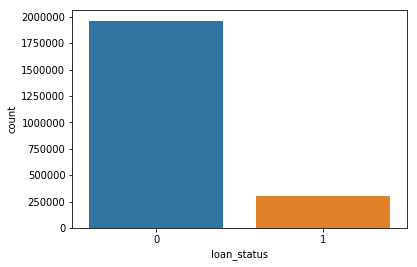

In [27]:
sns.countplot(x='loan_status', data=model_data)
plt.show()

In [28]:
features = ["loan_status","open_il_12m","total_rec_prncp","last_pymnt_amnt","grade",
             "settlement_percentage","total_rec_late_fee","debt_settlement_flag",
             "settlement_term","installment","open_il_24m","inq_last_12m","loan_amnt",
             "funded_amnt"]
model2_data = model_data[features]
model2_data.groupby('loan_status').mean()

,open_il_12m,total_rec_prncp,last_pymnt_amnt,grade,settlement_percentage,total_rec_late_fee,debt_settlement_flag,settlement_term,installment,open_il_24m,inq_last_12m,loan_amnt,funded_amnt
loan_status,,,,,,,,,,,,,
0,3.632274e+07,10021.867164,3801.725502,2.550376,9.999852e+07,0.817001,0.000015,9.999852e+07,442.501742,3.632274e+07,3.632280e+07,14953.970312,14949.279356
1,5.136930e+07,4565.458405,492.534726,3.408553,8.895496e+07,5.696887,0.110450,8.895496e+07,467.495141,5.136930e+07,5.136930e+07,15656.776364,15647.729089


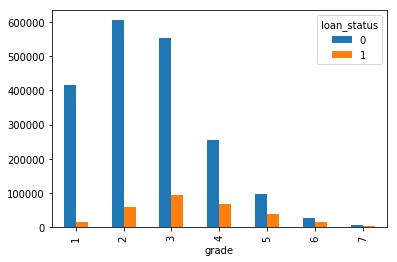

In [29]:
pd.crosstab(model2_data.grade,model2_data.loan_status).plot(kind='bar')

In [32]:
logis = LogisticRegression()
logis.fit(xx_train, yy_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
yy_pred = logis.predict(xx_test)

In [34]:
logis.score(xx_test, yy_test)

0.8807433194583907

In [36]:
logis_roc_auc = roc_auc_score(yy_test, yy_pred)
logis_roc_auc

0.5508063396024447